In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import datetime
import seaborn

from functools import reduce

# Loading the dataset

In [291]:
garmin_df = pd.read_csv('../../data/public_data/raw/garmin/ACTIVITIESdata.csv', delimiter=';', na_values="None")

In [292]:
garmin_df.head()

,ActivityType,StartTime,EndTime,AltitudeAvg,AltitudeMin,AltitudeMax,Ascent,Descent,Distance,Duration,HrAvg,HrMin,HrMax,Calories,SpeedAvg,SpeedMax,CadenceAvg,CadenceMax
0,Biking,2020-05-22 16:02:26+00:00,2020-05-22 18:15:02+00:00,101.078634,72.400002,136.199997,280.399994,280.399994,45942.74,7956.0,109.846567,75.0,NaN,761,20.788570,NaN,NaN,NaN
1,Other,2020-05-25 15:58:03+00:00,2020-05-25 17:51:27+00:00,115.228878,95.000000,140.000000,672.399803,680.399803,30138.35,6804.0,151.691123,92.0,NaN,1278,15.946217,NaN,NaN,NaN
2,Biking,2020-05-27 14:53:05+00:00,2020-05-27 15:15:10+00:00,125.135792,106.400002,135.399994,44.599976,46.399979,8275.91,1325.0,113.271150,85.0,NaN,180,22.485491,NaN,NaN,NaN
3,Biking,2020-05-27 20:08:04+00:00,2020-05-27 20:23:08+00:00,124.301198,117.800003,136.199997,33.000000,39.000000,6426.94,904.0,109.227545,76.0,NaN,109,25.594009,NaN,NaN,NaN
4,Other,2020-05-28 14:52:45+00:00,2020-05-28 15:58:34+00:00,144.943349,130.600006,159.000000,430.600098,428.000092,16747.02,3949.0,149.208649,86.0,NaN,777,15.266972,NaN,NaN,NaN


In [293]:
garmin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ActivityType  297 non-null    object 
 1   StartTime     289 non-null    object 
 2   EndTime       289 non-null    object 
 3   AltitudeAvg   284 non-null    float64
 4   AltitudeMin   284 non-null    float64
 5   AltitudeMax   284 non-null    float64
 6   Ascent        297 non-null    float64
 7   Descent       297 non-null    float64
 8   Distance      297 non-null    float64
 9   Duration      289 non-null    float64
 10  HrAvg         276 non-null    float64
 11  HrMin         276 non-null    float64
 12  HrMax         0 non-null      float64
 13  Calories      297 non-null    int64  
 14  SpeedAvg      289 non-null    float64
 15  SpeedMax      0 non-null      float64
 16  CadenceAvg    0 non-null      float64
 17  CadenceMax    0 non-null      float64
dtypes: float64(14), int64(1), obje

# Handling Nans

In [294]:
# Drop columns with all nan values:
garmin_df = garmin_df.drop(columns=['HrMax', 'SpeedMax', 'CadenceAvg', 'CadenceMax'])
garmin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ActivityType  297 non-null    object 
 1   StartTime     289 non-null    object 
 2   EndTime       289 non-null    object 
 3   AltitudeAvg   284 non-null    float64
 4   AltitudeMin   284 non-null    float64
 5   AltitudeMax   284 non-null    float64
 6   Ascent        297 non-null    float64
 7   Descent       297 non-null    float64
 8   Distance      297 non-null    float64
 9   Duration      289 non-null    float64
 10  HrAvg         276 non-null    float64
 11  HrMin         276 non-null    float64
 12  Calories      297 non-null    int64  
 13  SpeedAvg      289 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory usage: 32.6+ KB


In [295]:
# exploring the null start time values
garmin_df[garmin_df['StartTime'].isna()]

,ActivityType,StartTime,EndTime,AltitudeAvg,AltitudeMin,AltitudeMax,Ascent,Descent,Distance,Duration,HrAvg,HrMin,Calories,SpeedAvg
5,Other,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,250,NaN
13,Other,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,384,NaN
18,Other,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,334,NaN
19,Other,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,589,NaN
29,Other,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,183,NaN
73,Other,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,282,NaN
105,Other,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,270,NaN
239,Other,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,414,NaN


In [296]:
# ^these occurences seem to provide very little information apart from the Calories and activity type 'other' which doesn't give much information
# remove these instances:
garmin_df = garmin_df[~garmin_df['StartTime'].isna()]
garmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 296
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ActivityType  289 non-null    object 
 1   StartTime     289 non-null    object 
 2   EndTime       289 non-null    object 
 3   AltitudeAvg   284 non-null    float64
 4   AltitudeMin   284 non-null    float64
 5   AltitudeMax   284 non-null    float64
 6   Ascent        289 non-null    float64
 7   Descent       289 non-null    float64
 8   Distance      289 non-null    float64
 9   Duration      289 non-null    float64
 10  HrAvg         276 non-null    float64
 11  HrMin         276 non-null    float64
 12  Calories      289 non-null    int64  
 13  SpeedAvg      289 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory usage: 33.9+ KB


In [297]:
# exploring null altitude values
garmin_df[garmin_df['AltitudeAvg'].isna()]

,ActivityType,StartTime,EndTime,AltitudeAvg,AltitudeMin,AltitudeMax,Ascent,Descent,Distance,Duration,HrAvg,HrMin,Calories,SpeedAvg
28,Other,2020-06-17 17:44:19+00:00,2020-06-17 17:59:30+00:00,NaN,NaN,NaN,0.0,0.0,348.56,911.0,127.970588,105.0,81,1.377405
45,Other,2020-07-04 11:45:53+00:00,2020-07-04 12:05:18+00:00,NaN,NaN,NaN,0.0,0.0,614.48,1165.0,131.416667,117.0,139,1.898822
60,Biking,2020-07-24 19:29:15+00:00,2020-07-24 20:06:05+00:00,NaN,NaN,NaN,0.0,0.0,15112.37,2210.0,137.332443,75.0,408,24.617435
61,Running,2020-07-25 11:21:28+00:00,2020-07-25 12:01:10+00:00,NaN,NaN,NaN,0.0,0.0,5276.31,2382.0,132.528662,89.0,407,7.974272
252,Other,2021-07-02 10:30:57+00:00,2021-07-02 10:35:52+00:00,NaN,NaN,NaN,0.0,0.0,81.19,295.0,NaN,NaN,16,0.990793


In [298]:
garmin_df['Ascent'].value_counts()

0.000000       5
6.000000       2
280.399994     1
1164.200096    1
728.600128     1
              ..
160.799919     1
209.000191     1
33.600037      1
151.399986     1
188.599701     1
Name: Ascent, Length: 284, dtype: int64

In [299]:
# ^When altitude is null the Ascent and Descent values are zero which is likely wrong and could skew the data
# set Ascent and Descent to null also
garmin_df.loc[garmin_df['AltitudeAvg'].isna(), 'Ascent'] = None
garmin_df.loc[garmin_df['AltitudeAvg'].isna(), 'Descent'] = None
garmin_df[garmin_df['AltitudeAvg'].isna()]

,ActivityType,StartTime,EndTime,AltitudeAvg,AltitudeMin,AltitudeMax,Ascent,Descent,Distance,Duration,HrAvg,HrMin,Calories,SpeedAvg
28,Other,2020-06-17 17:44:19+00:00,2020-06-17 17:59:30+00:00,NaN,NaN,NaN,NaN,NaN,348.56,911.0,127.970588,105.0,81,1.377405
45,Other,2020-07-04 11:45:53+00:00,2020-07-04 12:05:18+00:00,NaN,NaN,NaN,NaN,NaN,614.48,1165.0,131.416667,117.0,139,1.898822
60,Biking,2020-07-24 19:29:15+00:00,2020-07-24 20:06:05+00:00,NaN,NaN,NaN,NaN,NaN,15112.37,2210.0,137.332443,75.0,408,24.617435
61,Running,2020-07-25 11:21:28+00:00,2020-07-25 12:01:10+00:00,NaN,NaN,NaN,NaN,NaN,5276.31,2382.0,132.528662,89.0,407,7.974272
252,Other,2021-07-02 10:30:57+00:00,2021-07-02 10:35:52+00:00,NaN,NaN,NaN,NaN,NaN,81.19,295.0,NaN,NaN,16,0.990793


## Missing data imputation with mean/median

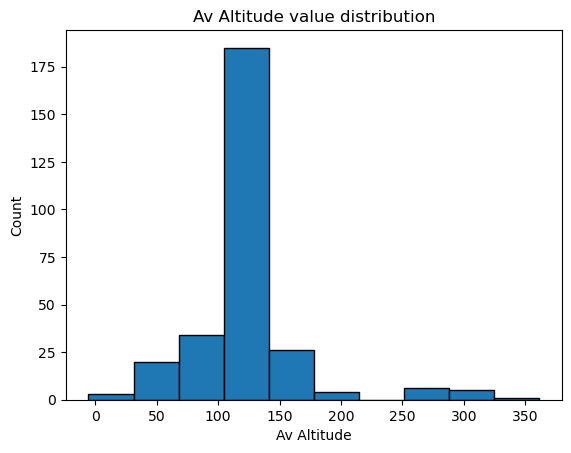

In [300]:
# Check distribution of fields, if a normal distribution impute with the mean, otherwise if skewed use the median
plt.hist(garmin_df['AltitudeAvg'].values, bins=10, edgecolor="k")
plt.title('Av Altitude value distribution')
plt.xlabel('Av Altitude')
plt.ylabel('Count')
plt.show()

In [301]:
#^follows a normal distribution more or less so impute with the mean:
garmin_df['AltitudeAvg'].fillna(garmin_df['AltitudeAvg'].mean(), inplace=True)

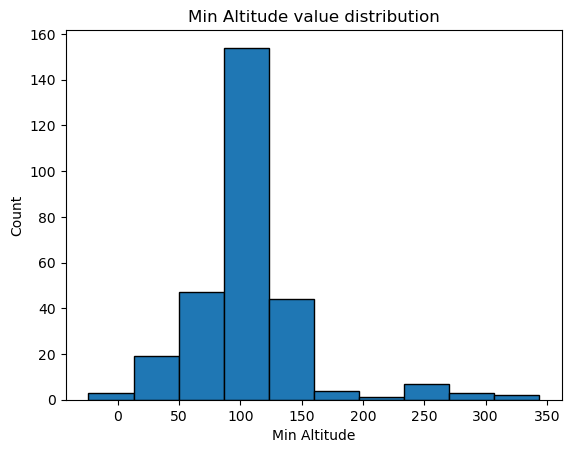

In [302]:
plt.hist(garmin_df['AltitudeMin'].values, bins=10, edgecolor="k")
plt.title('Min Altitude value distribution')
plt.xlabel('Min Altitude')
plt.ylabel('Count')
plt.show()

In [303]:
#^follows a normal distribution more or less so impute with the mean:
garmin_df['AltitudeMin'].fillna(garmin_df['AltitudeMin'].mean(), inplace=True)

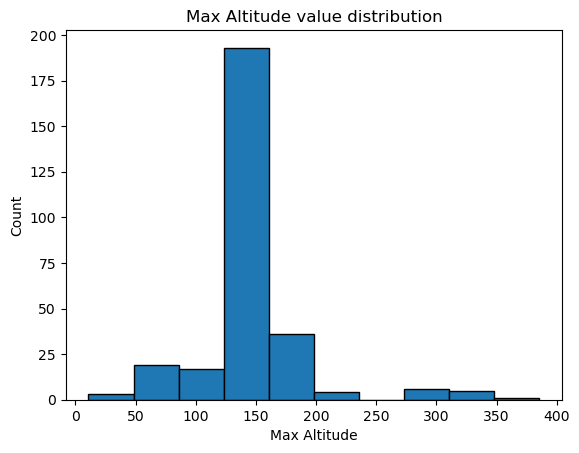

In [304]:
plt.hist(garmin_df['AltitudeMax'].values, bins=10, edgecolor="k")
plt.title('Max Altitude value distribution')
plt.xlabel('Max Altitude')
plt.ylabel('Count')
plt.show()

In [305]:
#^follows a normal distribution more or less so impute with the mean:
garmin_df['AltitudeMax'].fillna(garmin_df['AltitudeMax'].mean(), inplace=True)

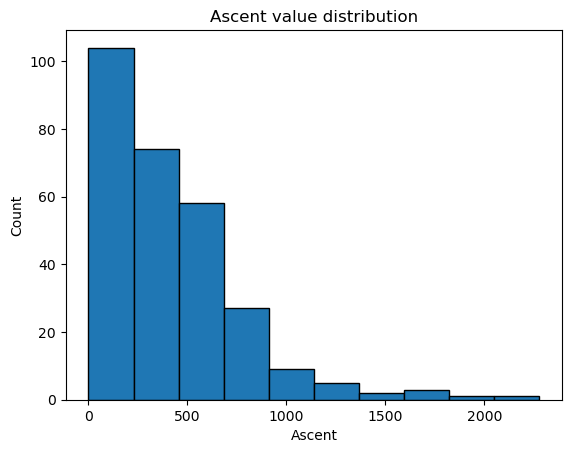

In [306]:
plt.hist(garmin_df['Ascent'].values, bins=10, edgecolor="k")
plt.title('Ascent value distribution')
plt.xlabel('Ascent')
plt.ylabel('Count')
plt.show()

In [307]:
#^skewed distribution so impute with the median:
garmin_df['Ascent'].fillna(garmin_df['Ascent'].median(), inplace=True)

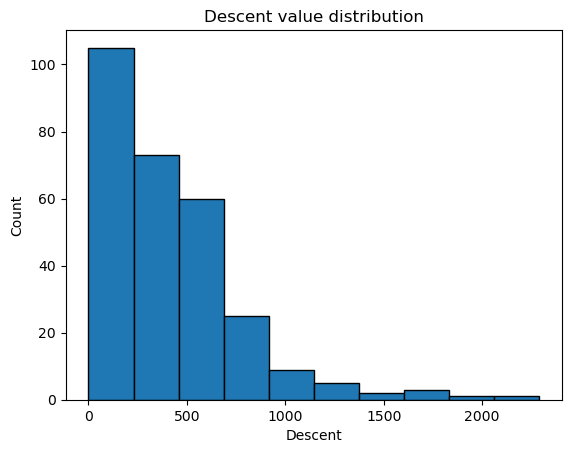

In [308]:
plt.hist(garmin_df['Descent'].values, bins=10, edgecolor="k")
plt.title('Descent value distribution')
plt.xlabel('Descent')
plt.ylabel('Count')
plt.show()

In [309]:
#^skewed distribution so impute with the median:
garmin_df['Descent'].fillna(garmin_df['Descent'].median(), inplace=True)

In [310]:
garmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 296
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ActivityType  289 non-null    object 
 1   StartTime     289 non-null    object 
 2   EndTime       289 non-null    object 
 3   AltitudeAvg   289 non-null    float64
 4   AltitudeMin   289 non-null    float64
 5   AltitudeMax   289 non-null    float64
 6   Ascent        289 non-null    float64
 7   Descent       289 non-null    float64
 8   Distance      289 non-null    float64
 9   Duration      289 non-null    float64
 10  HrAvg         276 non-null    float64
 11  HrMin         276 non-null    float64
 12  Calories      289 non-null    int64  
 13  SpeedAvg      289 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory usage: 33.9+ KB


In [311]:
# explore heartrate null values
garmin_df[garmin_df['HrAvg'].isna()]

,ActivityType,StartTime,EndTime,AltitudeAvg,AltitudeMin,AltitudeMax,Ascent,Descent,Distance,Duration,HrAvg,HrMin,Calories,SpeedAvg
58,Running,2020-07-13 19:25:32+00:00,2020-07-13 19:33:41+00:00,206.100815,205.600006,206.600006,6.199936,5.199936,181.46,489.0,NaN,NaN,10,1.335902
65,Biking,2020-07-30 16:55:53+00:00,2020-07-30 18:56:06+00:00,107.940108,79.400002,142.399994,611.999855,619.399857,49411.57,7213.0,NaN,NaN,1845,24.661258
67,Other,2020-08-03 16:01:50+00:00,2020-08-03 17:33:36+00:00,92.648212,65.599998,120.400002,570.400047,578.000053,33614.86,5506.0,NaN,NaN,1467,21.978477
93,Biking,2020-09-02 14:42:35+00:00,2020-09-02 17:36:19+00:00,102.530581,78.199997,134.199997,1190.800140,1187.200142,73559.84,10424.0,NaN,NaN,2858,25.404396
109,Biking,2020-09-26 14:24:02+00:00,2020-09-26 16:33:52+00:00,104.621895,77.800003,147.199997,847.799873,859.799873,56408.23,7790.0,NaN,NaN,2294,26.067988
118,Running,2020-10-28 13:05:33+00:00,2020-10-28 14:02:58+00:00,126.659913,115.000000,147.199997,208.399948,207.599953,9013.91,3445.0,NaN,NaN,715,9.419471
134,Running,2020-12-14 16:00:18+00:00,2020-12-14 16:28:57+00:00,179.865507,173.399994,186.199997,83.999939,80.999939,5697.28,1719.0,NaN,NaN,487,11.931476
212,Running,2021-04-14 15:22:34+00:00,2021-04-14 16:36:21+00:00,142.938672,125.400002,181.800003,254.400124,256.800117,9846.35,4427.0,NaN,NaN,697,8.006971
221,Running,2021-04-30 16:31:26+00:00,2021-04-30 17:28:19+00:00,154.376018,145.800003,165.800003,160.199768,164.399780,10838.04,3413.0,NaN,NaN,936,11.431862
226,Other,2021-05-16 15:59:37+00:00,2021-05-16 18:40:30+00:00,116.783240,88.199997,148.000000,692.400131,701.200134,39368.70,9653.0,NaN,NaN,1979,14.682204


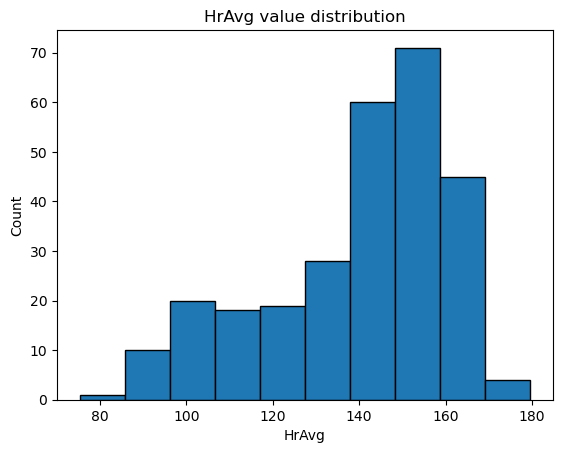

In [312]:
plt.hist(garmin_df['HrAvg'].values, bins=10, edgecolor="k")
plt.title('HrAvg value distribution')
plt.xlabel('HrAvg')
plt.ylabel('Count')
plt.show()

In [313]:
#^skewed distribution so impute with the median:
garmin_df['HrAvg'].fillna(garmin_df['HrAvg'].median(), inplace=True)

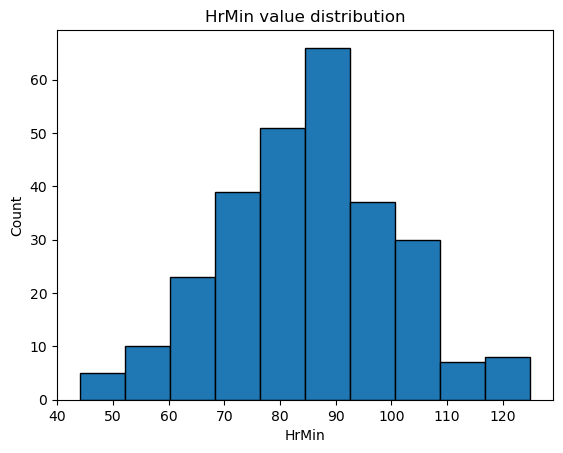

In [314]:
plt.hist(garmin_df['HrMin'].values, bins=10, edgecolor="k")
plt.title('HrMin value distribution')
plt.xlabel('HrMin')
plt.ylabel('Count')
plt.show()

In [315]:
#^follows a normal distribution more or less so impute with the mean:
garmin_df['HrMin'].fillna(garmin_df['HrMin'].mean(), inplace=True)

In [316]:
garmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 296
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ActivityType  289 non-null    object 
 1   StartTime     289 non-null    object 
 2   EndTime       289 non-null    object 
 3   AltitudeAvg   289 non-null    float64
 4   AltitudeMin   289 non-null    float64
 5   AltitudeMax   289 non-null    float64
 6   Ascent        289 non-null    float64
 7   Descent       289 non-null    float64
 8   Distance      289 non-null    float64
 9   Duration      289 non-null    float64
 10  HrAvg         289 non-null    float64
 11  HrMin         289 non-null    float64
 12  Calories      289 non-null    int64  
 13  SpeedAvg      289 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory usage: 33.9+ KB


In [317]:
garmin_df.isna().sum().sum()

0

# Convert date time fields to data type datetime

In [318]:
garmin_df['StartTime'] = pd.to_datetime(garmin_df['StartTime'], format='%Y-%m-%d %H:%M:%S')
garmin_df['EndTime'] = pd.to_datetime(garmin_df['EndTime'], format='%Y-%m-%d %H:%M:%S')

In [319]:
garmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 296
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   ActivityType  289 non-null    object             
 1   StartTime     289 non-null    datetime64[ns, UTC]
 2   EndTime       289 non-null    datetime64[ns, UTC]
 3   AltitudeAvg   289 non-null    float64            
 4   AltitudeMin   289 non-null    float64            
 5   AltitudeMax   289 non-null    float64            
 6   Ascent        289 non-null    float64            
 7   Descent       289 non-null    float64            
 8   Distance      289 non-null    float64            
 9   Duration      289 non-null    float64            
 10  HrAvg         289 non-null    float64            
 11  HrMin         289 non-null    float64            
 12  Calories      289 non-null    int64              
 13  SpeedAvg      289 non-null    float64            
dtypes: datetim

# Exploring the dataset

In [320]:
garmin_df.describe()

,AltitudeAvg,AltitudeMin,AltitudeMax,Ascent,Descent,Distance,Duration,HrAvg,HrMin,Calories,SpeedAvg
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,124.905305,107.271831,145.754929,397.056050,396.660201,20060.572180,4848.851211,140.378757,85.590580,857.484429,13.979385
std,45.299237,46.363098,45.675655,356.844085,356.096316,18629.024047,3022.808434,20.669901,15.066834,540.782921,6.535434
min,-5.438554,-23.799999,10.800000,1.200005,0.000000,81.190000,295.000000,75.317778,44.000000,10.000000,0.990793
25%,110.748639,88.199997,134.399994,151.399986,151.399986,8843.490000,2913.000000,129.531945,76.000000,512.000000,8.457768
50%,124.890683,106.400002,143.000000,286.999866,286.999832,14536.070000,4446.000000,146.121688,85.590580,783.000000,14.822061
75%,132.556582,122.000000,155.199997,600.400261,602.400261,28337.820000,6018.000000,155.969310,95.000000,1096.000000,18.354745
max,361.413272,343.799988,385.600006,2277.399996,2290.799998,128954.950000,22456.000000,179.602874,125.000000,3698.000000,28.984413


## One-hot encode the ActivityType

In [321]:
garmin_df['ActivityType'].describe()

count       289
unique        3
top       Other
freq        140
Name: ActivityType, dtype: object

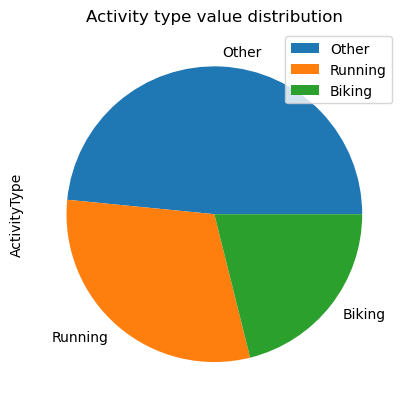

In [322]:
garmin_df[['ActivityType']].apply(pd.value_counts).plot(kind='pie', subplots=True)
plt.title('Activity type value distribution')
plt.show()

In [323]:
garmin_df = pd.get_dummies(garmin_df, columns=['ActivityType'])
garmin_df


,StartTime,EndTime,AltitudeAvg,AltitudeMin,AltitudeMax,Ascent,Descent,Distance,Duration,HrAvg,HrMin,Calories,SpeedAvg,ActivityType_Biking,ActivityType_Other,ActivityType_Running
0,2020-05-22 16:02:26+00:00,2020-05-22 18:15:02+00:00,101.078634,72.400002,136.199997,280.399994,280.399994,45942.74,7956.0,109.846567,75.0,761,20.788570,1,0,0
1,2020-05-25 15:58:03+00:00,2020-05-25 17:51:27+00:00,115.228878,95.000000,140.000000,672.399803,680.399803,30138.35,6804.0,151.691123,92.0,1278,15.946217,0,1,0
2,2020-05-27 14:53:05+00:00,2020-05-27 15:15:10+00:00,125.135792,106.400002,135.399994,44.599976,46.399979,8275.91,1325.0,113.271150,85.0,180,22.485491,1,0,0
3,2020-05-27 20:08:04+00:00,2020-05-27 20:23:08+00:00,124.301198,117.800003,136.199997,33.000000,39.000000,6426.94,904.0,109.227545,76.0,109,25.594009,1,0,0
4,2020-05-28 14:52:45+00:00,2020-05-28 15:58:34+00:00,144.943349,130.600006,159.000000,430.600098,428.000092,16747.02,3949.0,149.208649,86.0,777,15.266972,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,2021-09-23 12:17:22+00:00,2021-09-23 14:25:53+00:00,310.251866,304.000000,324.799988,217.799774,217.399780,13982.24,7711.0,128.056620,71.0,938,6.527826,0,0,1
293,2021-09-25 14:03:28+00:00,2021-09-25 15:30:24+00:00,321.579380,316.600006,337.399994,232.600159,230.200134,11881.94,5216.0,135.845801,72.0,776,8.200725,0,0,1
294,2021-10-02 11:09:37+00:00,2021-10-02 12:27:45+00:00,256.710279,233.600006,280.799988,191.999619,174.799606,10122.58,4688.0,137.871036,99.0,668,7.773312,0,0,1
295,2021-10-09 11:35:16+00:00,2021-10-09 13:17:20+00:00,275.657213,268.200012,288.799988,317.400391,317.400391,17013.52,6124.0,161.528981,103.0,1223,10.001416,0,0,1


In [324]:
# correlation
corr = garmin_df.corr()
corr.style.background_gradient(cmap='coolwarm')

/var/folders/jn/tpkp2dnx08592l_y59z9_f3m0000gn/T/ipykernel_97970/3902651920.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = garmin_df.corr()


,AltitudeAvg,AltitudeMin,AltitudeMax,Ascent,Descent,Distance,Duration,HrAvg,HrMin,Calories,SpeedAvg,ActivityType_Biking,ActivityType_Other,ActivityType_Running
AltitudeAvg,1.000000,0.979263,0.971349,-0.139706,-0.141587,-0.170915,-0.009506,-0.050583,-0.032403,-0.055887,-0.252730,-0.146483,-0.097335,0.235594
AltitudeMin,0.979263,1.000000,0.916039,-0.259824,-0.261904,-0.276373,-0.097733,-0.124997,-0.070388,-0.160016,-0.353626,-0.200195,-0.120492,0.308370
AltitudeMax,0.971349,0.916039,1.000000,0.040095,0.038308,-0.001346,0.137667,0.041182,-0.002928,0.102018,-0.135502,-0.063544,-0.116047,0.182370
Ascent,-0.139706,-0.259824,0.040095,1.000000,0.999847,0.881676,0.755928,0.517458,0.198499,0.873928,0.518236,0.195303,0.168766,-0.356456
Descent,-0.141587,-0.261904,0.038308,0.999847,1.000000,0.881315,0.754920,0.517539,0.198214,0.873663,0.519906,0.195712,0.169171,-0.357259
Distance,-0.170915,-0.276373,-0.001346,0.881676,0.881315,1.000000,0.831253,0.331057,0.027881,0.874244,0.623520,0.473608,-0.054419,-0.360867
Duration,-0.009506,-0.097733,0.137667,0.755928,0.754920,0.831253,1.000000,0.145299,-0.159143,0.876411,0.225230,0.175205,0.021777,-0.179009
HrAvg,-0.050583,-0.124997,0.041182,0.517458,0.517539,0.331057,0.145299,1.000000,0.624641,0.485729,0.414894,-0.130045,0.031947,0.080622
HrMin,-0.032403,-0.070388,-0.002928,0.198499,0.198214,0.027881,-0.159143,0.624641,1.000000,0.125999,0.194316,-0.137138,0.042664,0.075273
Calories,-0.055887,-0.160016,0.102018,0.873928,0.873663,0.874244,0.876411,0.485729,0.125999,1.000000,0.402883,0.131539,0.056716,-0.178232


In [325]:
# Checking duration:
end_start_diff = pd.to_timedelta((garmin_df['EndTime'] - garmin_df['StartTime']))/pd.Timedelta('1s')
(end_start_diff - garmin_df['Duration']).describe()

count    289.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

/Users/rorycoulson/opt/anaconda3/envs/gdp/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


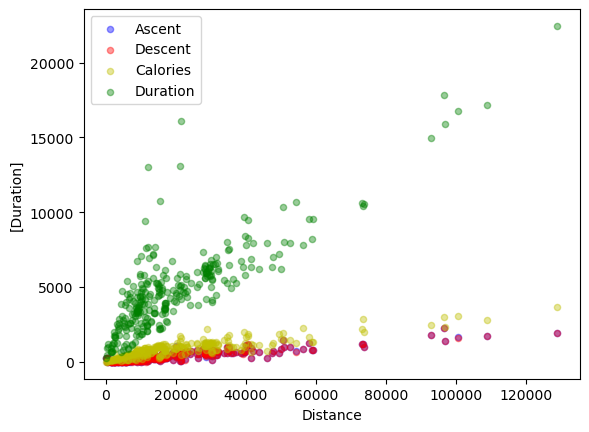

In [326]:
ax = garmin_df.sort_values('Distance').plot(x='Distance', y=['Ascent'], kind='scatter', c='b', alpha=0.4, label='Ascent')
garmin_df.sort_values('Distance').plot(ax=ax, x='Distance', y=['Descent'], kind='scatter', c='r', alpha=0.4, label='Descent') #, 'Descent', 'Calories', 'Duration'
garmin_df.sort_values('Distance').plot(ax=ax,x='Distance', y=['Calories'], kind='scatter', c='y', alpha=0.4, label='Calories')
garmin_df.sort_values('Distance').plot(ax=ax,x='Distance', y=['Duration'], kind='scatter', c='g', alpha=0.4, label='Duration')
plt.legend()
plt.show()

/Users/rorycoulson/opt/anaconda3/envs/gdp/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


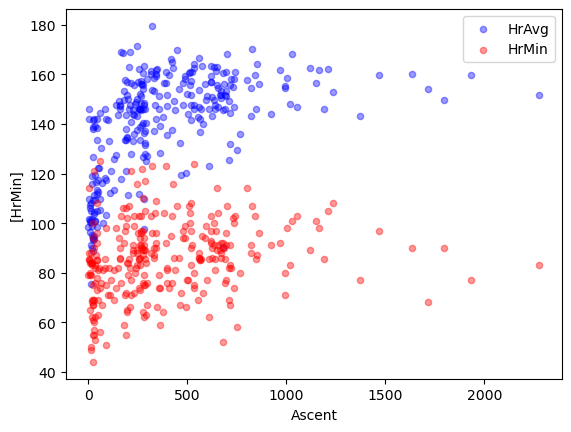

In [327]:
ax = garmin_df.sort_values('Ascent').plot(x='Ascent', y=['HrAvg'], kind='scatter', c='b', alpha=0.4, label='HrAvg')
garmin_df.sort_values('Ascent').plot(ax=ax, x='Ascent', y=['HrMin'], kind='scatter', c='r', alpha=0.4, label='HrMin') #, 'Descent', 'Calories', 'Duration'
plt.legend()
plt.show()


# Save cleaned and preprocessed dataset

In [328]:
save_folder_path = '../../data/public_data/cleaned/garmin/'
garmin_df.to_csv(save_folder_path + '/cleaned_garmin.csv', index=False)